# Predicting the Future

# Predicting unknow case - treated HDPE + SWCNT

### What happens if we want to predict composite we do not have data before?

We know `treated HDPE` with MWCNT and GNP

But we do not have data with SWCNT

If we force Model to predict, what would we have?

In [1]:
import numpy as np
import pandas as pd 
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing import MinMaxScaler, StandardScaler

# FUNCTIONS
from functions import *

## Import data

In [2]:
# Load all data
filename_alldata = "data/_nanocomposite_data.csv"
alldata = pd.read_csv(filename_alldata, index_col=None, header=0)
alldata_clean = alldata.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1)
# Load unknown data
filename_unknowndata = "data-evaluation/HDPEtreated_SWCNT_data-set-6.csv"
unknowndata = pd.read_csv(filename_unknowndata, index_col=None, header=0)
unknowndata.drop(['polymer_p2', 'ratio_1_2','filler_2','wt_l2','owner','foaming'], axis=1, inplace=True)   #,'foaming'
unknowndata.head()

,polymer_1,filler_1,wt_l1,conductivity
0,HDPEtreated,SWCNT,2.785803,NaN
1,HDPEtreated,SWCNT,4.828533,NaN
2,HDPEtreated,SWCNT,3.791079,NaN
3,HDPEtreated,SWCNT,23.730889,NaN
4,HDPEtreated,SWCNT,0.613343,NaN


## Loading saved data

Loading saved model and scalers

In [3]:
model = tf.keras.models.load_model('saved/predictor-conductivity-model')

from pickle import load
X_scaler = load(open('saved/X_scaler.pkl', 'rb'))
Y_scaler = load(open('saved/Y_scaler.pkl', 'rb'))

In [4]:
unknowndata_clean = unknowndata.copy()
unknowndata_clean = mapStringToNum (unknowndata_clean)
unknowndata_clean.head()

,polymer_1,filler_1,wt_l1,conductivity
0,1,1,2.785803,NaN
1,1,1,4.828533,NaN
2,1,1,3.791079,NaN
3,1,1,23.730889,NaN
4,1,1,0.613343,NaN


In [5]:
# Pull out columns for X (data to predict)
X_unknowndata = unknowndata_clean.drop('conductivity', axis=1).values
X_scaled_unknowndata = X_scaler.transform(X_unknowndata)

In [6]:
# Calculate predictions
PredValSet_unknowndata = model.predict(X_scaled_unknowndata)
PredValSet_unknowndata2 = Y_scaler.inverse_transform(PredValSet_unknowndata)

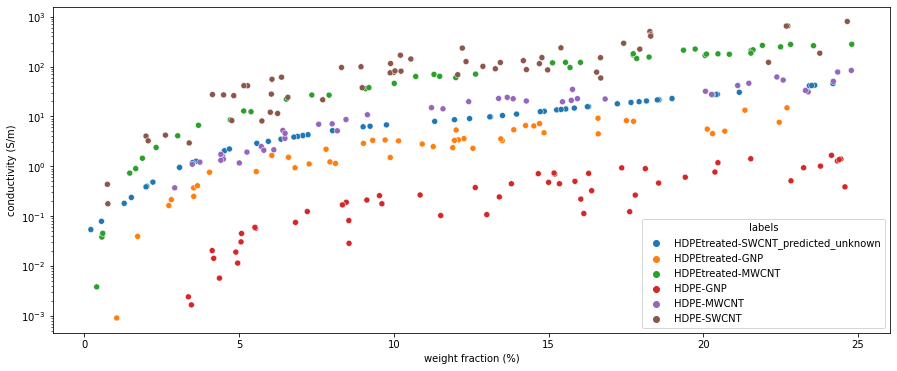

In [7]:
compdata = unknowndata.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata2

alldata['labels']    = alldata['polymer_1'] + "-" + alldata['filler_1']
compdata1 = alldata.copy()

compdata = pd.concat([compdata, compdata1], ignore_index = True)

# reduce data rows to 5% (sparse data)
drop_indices = np.random.choice(compdata.index, int(np.ceil(len(compdata.index) * 0.95) ) , replace=False)
compdata_subset = compdata.drop(drop_indices)

fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
g = sns.scatterplot(data=compdata_subset ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax )


# Conclusion

## Average prediction

We would expect the treated HDPE/SWCNT has higher conductivity. However, the prediction shows the average in conductivity. The issues might due to the fact that there is a lack of other combinations of polymer and filler, especially for SWCNT where there is only one dataset of SWCNT input to train the model.

## Good point

At the very low end, the prediction shows that the treated HDPE/SWCNT has higher conductivity than the rest which is expected for treated polymer.

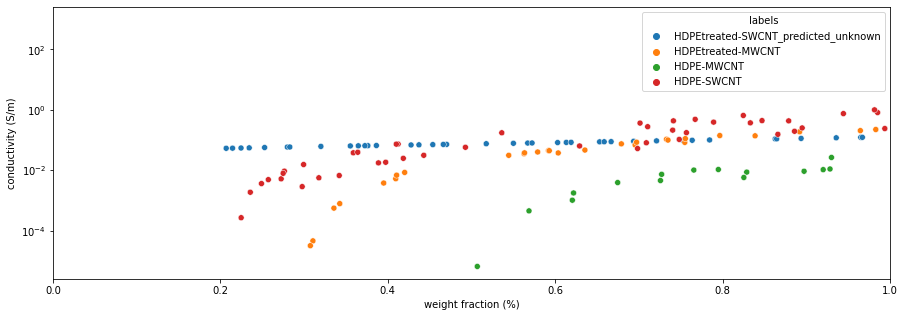

In [8]:
compdata = unknowndata.copy()
compdata['labels']    = compdata['polymer_1'] + "-" + compdata['filler_1'] + "_predicted_unknown"
compdata['conductivity'] = PredValSet_unknowndata2

alldata['labels']    = alldata['polymer_1'] + "-" + alldata['filler_1']
compdata1 = alldata[alldata['filler_1']!='GNP'].copy()

compdata = pd.concat([compdata, compdata1], ignore_index = True)

fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xlabel("weight fraction (%)")
plt.ylabel("conductivity (S/m)")
plt.yscale("log")
plt.xlim([0,1])
g = sns.scatterplot(data=compdata ,x="wt_l1", y ="conductivity", hue="labels" , ax = ax );